In [1]:
# imports
import pandas as pd
import sqlite3

# connect to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

In [2]:
pd.options.display.max_columns = None

follow along from this tutorial:
https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1

Data Source: http://www.seanlahman.com/baseball-archive/statistics/

In [3]:
# querying database for all seasons where a team played 150 or more games and is still active
query = '''
SELECT *
FROM Teams
INNER JOIN TeamsFranchises
ON Teams.franchID == TeamsFranchises.franchID
WHERE Teams.G >= 150 and TeamsFranchises.active == 'Y';

'''

# create dataframe from query
Teams = conn.execute(query).fetchall()

In [4]:
# convert Teams to DataFrame
teams_df = pd.DataFrame(Teams)
teams_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [5]:
# add column names to the dataframe, 
# from: http://www.seanlahman.com/files/database/readme2016.txt
cols = ['yearID','lgID','teamID','franchID','divID',
        'Rank','G','Ghome','W','L','DivWin','WCWin',
        'LgWin','WSWin','R','AB','H','2B','3B','HR',
        'BB','SO','SB','CS','HBP','SF','RA','ER','ERA',
        'CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
        'E','DP','FP','name','park','attendance','BPF',
        'PPF','teamIDBR','teamIDlahman45','teamIDretro',
        'franchID','franchName','active','NAassoc']

teams_df.columns = cols

teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [6]:
teams_df.shape

(2287, 52)

In [7]:
# Dropping unnecesary column variables as well as those derived from the 
# target column Wins.
drop_cols = ['lgID','franchID','divID','Rank','Ghome',
             'L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF',
             'teamIDBR','teamIDlahman45','teamIDretro',
             'franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis=1)

df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


In [8]:
df.isnull().sum()

yearID       0
teamID       0
G            0
W            0
R            0
AB           0
H            0
2B           0
3B           0
HR           0
BB           0
SO         110
SB           0
CS         419
HBP       1777
RA           0
ER           0
ERA          0
CG           0
SHO          0
SV           0
IPouts       0
HA           0
HRA          0
BBA          0
SOA          0
E            0
DP          22
FP           0
dtype: int64

In [9]:
# drop columns with null values
# caught stealing and hit-by-pitch
df = df.drop(['CS', 'HBP'], axis=1)

In [10]:
# fill null values with median
# strikeouts and double plays
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

In [11]:
# check null values
df.isnull().sum()

yearID    0
teamID    0
G         0
W         0
R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

In [12]:
# import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

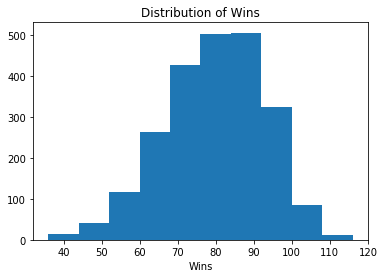

In [13]:
# distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [14]:
# create bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5


In [15]:
# create win_bins column
df['win_bins'] = df['W'].apply(assign_win_bins)

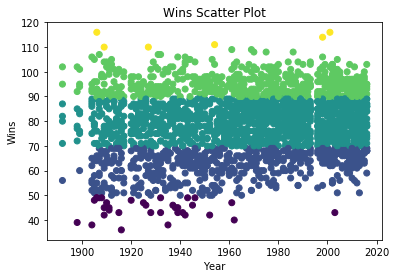

In [16]:
# scatter plot of Year vs Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [17]:
# filter for years greater than 1900
df = df[df['yearID'] > 1900]

In [18]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3


In [19]:
# create runs per year and games per year dicts
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 1369

In [20]:
# create MLB runs per game (per year) dict
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

print(mlb_runs_per_game)

{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.457598856598381, 1980: 4.2881235154394295, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353

In [21]:
# create list from mlb_runs_per_game
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

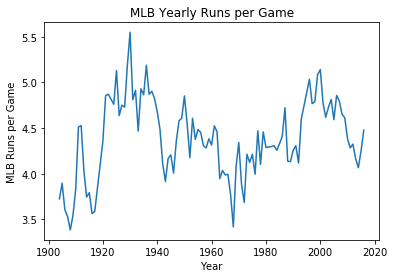

In [22]:
# create line plot of Year vs MLB runs per game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [23]:
# create year_label column to provide info about how
# certain years are related
# dead ball eras, live ball/steriod eras

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
    

In [24]:
# add year_label column
df['year_label'] = df['yearID'].apply(assign_label)

In [25]:
# create dummies for new column
dummy_df = pd.get_dummies(df['year_label'], prefix='era')

In [26]:
dummy_df.head()

,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


In [27]:
# concatenate df and dummy_df
df = pd.concat([df, dummy_df], axis=1)
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3,4,0,0,0,1,0,0,0,0
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3,4,0,0,0,1,0,0,0,0
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3,5,0,0,0,0,1,0,0,0
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3,5,0,0,0,0,1,0,0,0
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3,5,0,0,0,0,1,0,0,0


In [28]:
# create column for MLB runs per game from mlb_runs_per_game dict
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]


In [29]:
df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [30]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3,4,0,0,0,1,0,0,0,0,4.525175
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3,4,0,0,0,1,0,0,0,0,4.460518
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3,5,0,0,0,0,1,0,0,0,3.946881
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3,5,0,0,0,0,1,0,0,0,4.035670
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3,5,0,0,0,0,1,0,0,0,3.988293


In [31]:
# convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    

In [32]:
df['decade_label'] = df['yearID'].apply(assign_decade)

In [33]:
# get dummies for decade label
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')

In [34]:
df = pd.concat([df, decade_df], axis=1)

In [35]:
# drop unnecessary columns
df = df.drop(['yearID', 'year_label', 'decade_label'], axis=1)

In [36]:
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3,0,0,0,1,0,0,0,0,4.525175,0,0,0,0,0,1,0,0,0,0,0
1,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3,0,0,0,1,0,0,0,0,4.460518,0,0,0,0,0,1,0,0,0,0,0
2,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3,0,0,0,0,1,0,0,0,3.946881,0,0,0,0,0,1,0,0,0,0,0
3,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3,0,0,0,0,1,0,0,0,4.035670,0,0,0,0,0,1,0,0,0,0,0
4,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3,0,0,0,0,1,0,0,0,3.988293,0,0,0,0,0,1,0,0,0,0,0


In [37]:
# create new features for runs per game and runs allowed per game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

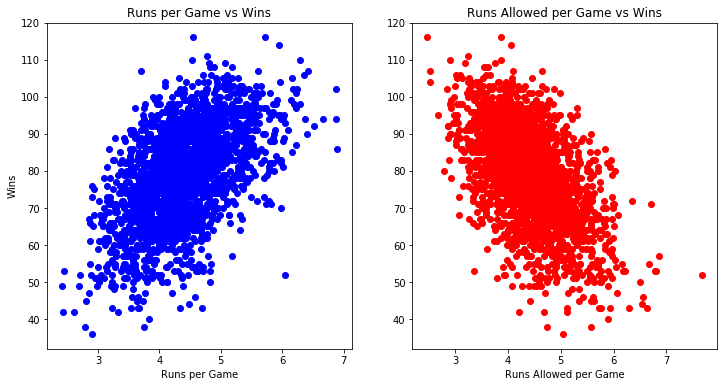

In [38]:
# create scatter plots 
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2 , 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

In [39]:
import seaborn as sns

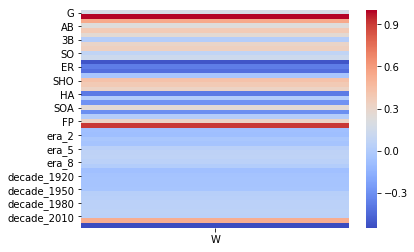

In [40]:
sns.heatmap(df.corr()[['W']], cmap='coolwarm')

In [41]:
df.corr()['W']

G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
era_1         -0.077104
era_2         -0.083089
era_3         -0.033073
era_4         -0.052278
era_5          0.042122
era_6          0.058439
era_7          0.066049
era_8          0.043453
mlb_rpg        0.006909
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    0.028594
decade_1970    0

In [42]:
# create a dataframe without the target variable
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO',
              'SB','RA','ER','ERA','CG', 'SHO','SV',
              'IPouts','HA','HRA','BBA','SOA','E','DP',
              'FP','era_1','era_2','era_3','era_4','era_5',
              'era_6','era_7','era_8','decade_1910','decade_1920',
              'decade_1930','decade_1940','decade_1950',
              'decade_1960','decade_1970','decade_1980',
              'decade_1990','decade_2000','decade_2010',
              'R_per_game','RA_per_game','mlb_rpg']

data_attributes = df[attributes]

data_attributes.head()


,G,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,mlb_rpg
0,162,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.592593,4.839506,4.525175
1,162,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.432099,4.358025,4.460518
2,161,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.708075,4.099379,3.946881
3,162,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.358025,3.401235,4.035670
4,162,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.253086,3.512346,3.988293


In [43]:
# import KMeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [44]:
# create silhouette score dict
s_score_dict = {}
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]
    
s_score_dict

{2: [0.3906998802293878],
 3: [0.33807585484810926],
 4: [0.2534094006101799],
 5: [0.23561577404187492],
 6: [0.2138869412081822],
 7: [0.19570350588885863],
 8: [0.1866085747852742],
 9: [0.1735454878870926],
 10: [0.16986446409819547]}

In [45]:
# create KMeans model and determine euclidian distances
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

In [46]:
# create a scatter plot using labels from KMeans model as color
labels = kmeans_model.labels_

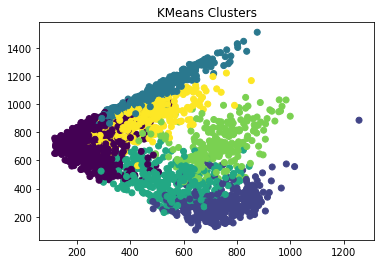

In [47]:
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [48]:
distances

array([[ 403.64157318,  905.96921371,  418.08948195,  691.28217379,
         881.91035476,  364.27867505],
       [ 176.63291442,  724.86201359,  462.79421258,  528.17076064,
         742.53312859,  356.92059367],
       [ 175.28064133,  760.02048493,  461.22878542,  533.34938643,
         670.03986589,  459.28750389],
       ...,
       [ 645.94940211, 1281.77528634,  315.40745596, 1063.25746178,
        1095.60371693,  628.81413485],
       [ 692.85283233, 1299.34088523,  309.93820869, 1072.79831862,
        1111.7177554 ,  628.41580125],
       [ 738.16587506, 1365.13388024,  349.40577985, 1136.23398531,
        1200.02051407,  665.81041136]])

In [50]:
# add labels from KMeans model to df and attributes list
df['labels'] = labels
attributes.append('labels')

df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,labels
0,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3,0,0,0,1,0,0,0,0,4.525175,0,0,0,0,0,1,0,0,0,0,0,4.592593,4.839506,5
1,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3,0,0,0,1,0,0,0,0,4.460518,0,0,0,0,0,1,0,0,0,0,0,4.432099,4.358025,0
2,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3,0,0,0,0,1,0,0,0,3.946881,0,0,0,0,0,1,0,0,0,0,0,3.708075,4.099379,0
3,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3,0,0,0,0,1,0,0,0,4.035670,0,0,0,0,0,1,0,0,0,0,0,3.358025,3.401235,0
4,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3,0,0,0,0,1,0,0,0,3.988293,0,0,0,0,0,1,0,0,0,0,0,3.253086,3.512346,0


In [52]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO',
                'SB','RA','ER','ERA','CG','SHO','SV','IPouts',
                'HA','HRA','BBA','SOA','E','DP','FP','era_1',
                'era_2','era_3','era_4','era_5','era_6','era_7',
                'era_8','decade_1910','decade_1920','decade_1930',
                'decade_1940','decade_1950','decade_1960','decade_1970',
                'decade_1980','decade_1990','decade_2000','decade_2010',
                'R_per_game','RA_per_game','mlb_rpg','labels','W']

data = df[numeric_cols]

In [53]:
data.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,mlb_rpg,labels,W
0,162,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.592593,4.839506,4.525175,5,70
1,162,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.432099,4.358025,4.460518,0,86
2,161,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.708075,4.099379,3.946881,0,70
3,162,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.358025,3.401235,4.035670,0,82
4,162,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.253086,3.512346,3.988293,0,75


In [54]:
data.shape

(2265, 48)

In [59]:
# set X and y values
X = data.drop(columns='W')
y = data['W']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
# instantiate model
lr = LinearRegression(normalize=True)

In [75]:
# fit model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
# make predictions
preds = lr.predict(X_test)

In [77]:
rmse = mean_squared_error(y_test, preds) ** 0.5
mae = mean_absolute_error(y_test, preds)

In [78]:
print(rmse)
print(mae)

3.492199732544346
2.8057848059395454


In [80]:
df[df['teamID'] == 'CHN']

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,mlb_rpg,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,labels
400,CHN,156,93,599,5210,1294,157,62,22,298,855.0,227,517,353,2.30,139,18,6,4149,1150,16,402,618,282,89.0,0.954,4,1,0,0,0,0,0,0,0,3.725781,1,0,0,0,0,0,0,0,0,0,0,3.839744,3.314103,4
401,CHN,155,92,667,5108,1249,157,82,12,448,855.0,267,442,319,2.04,133,23,2,4221,1135,14,385,627,246,99.0,0.962,4,1,0,0,0,0,0,0,0,3.896524,1,0,0,0,0,0,0,0,0,0,0,4.303226,2.851613,4
402,CHN,155,116,705,5018,1316,181,71,20,448,855.0,283,381,270,1.75,125,30,10,4164,1018,12,446,702,190,100.0,0.970,5,1,0,0,0,0,0,0,0,3.607282,1,0,0,0,0,0,0,0,0,0,0,4.548387,2.458065,4
403,CHN,155,107,574,4892,1224,162,48,13,435,855.0,235,390,264,1.73,114,32,8,4119,1054,11,402,586,211,110.0,0.967,4,1,0,0,0,0,0,0,0,3.533017,1,0,0,0,0,0,0,0,0,0,0,3.703226,2.516129,4
404,CHN,158,99,624,5085,1267,196,56,19,418,855.0,212,461,341,2.14,108,29,12,4299,1137,20,437,668,206,76.0,0.969,4,1,0,0,0,0,0,0,0,3.385450,1,0,0,0,0,0,0,0,0,0,0,3.949367,2.917722,4
405,CHN,155,104,635,4999,1227,203,60,20,420,855.0,187,390,272,1.75,111,32,11,4197,1094,6,364,680,244,95.0,0.962,4,1,0,0,0,0,0,0,0,3.547542,1,0,0,0,0,0,0,0,0,0,0,4.096774,2.516129,4
406,CHN,154,104,712,4977,1333,219,84,34,542,501.0,173,499,384,2.51,100,25,13,4134,1171,18,474,609,229,110.0,0.964,4,1,0,0,0,0,0,0,0,3.835068,1,0,0,0,0,0,0,0,0,0,0,4.623377,3.240260,4
407,CHN,157,92,757,5130,1335,218,101,54,585,617.0,214,607,455,2.90,85,12,16,4233,1270,26,525,582,260,114.0,0.960,4,1,0,0,0,0,0,0,0,4.512530,1,0,0,0,0,0,0,0,0,0,0,4.821656,3.866242,4
408,CHN,152,91,756,5048,1398,245,90,43,560,615.0,164,668,516,3.42,80,15,9,4074,1307,33,493,554,249,125.0,0.960,4,1,0,0,0,0,0,0,0,4.526786,1,0,0,0,0,0,0,0,0,0,0,4.973684,4.394737,3
409,CHN,155,88,720,5022,1289,195,96,59,554,634.0,181,630,477,3.13,89,12,15,4116,1330,39,478,556,260,106.0,0.959,3,1,0,0,0,0,0,0,0,4.037277,1,0,0,0,0,0,0,0,0,0,0,4.645161,4.064516,4


In [85]:
import numpy as np

In [106]:
cubs_18 = np.array(data.drop(columns='W').loc[507])

In [107]:
cubs_18

array([1.62000000e+02, 8.08000000e+02, 5.50300000e+03, 1.40900000e+03,
       2.93000000e+02, 3.00000000e+01, 1.99000000e+02, 6.56000000e+02,
       1.33900000e+03, 6.60000000e+01, 5.56000000e+02, 5.11000000e+02,
       3.15000000e+00, 5.00000000e+00, 1.50000000e+01, 3.80000000e+01,
       4.37900000e+03, 1.12500000e+03, 1.63000000e+02, 4.95000000e+02,
       1.44100000e+03, 1.01000000e+02, 1.16000000e+02, 9.83000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.98765432e+00,
       3.43209877e+00, 4.47775947e+00, 2.00000000e+00])

In [109]:
lr.predict(cubs_18.reshape(1, -1))

array([102.43117262])